In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
df = pd.read_csv("/content/drive/MyDrive/Skripsi/Dataset/All_Historical_Data_Separately/Silver Spot Price Daily.csv")

df.head()

,DATE,SILVER_PRICE,SILVER_OPEN,SILVER_HIGH,SILVER_LOW,SILVER_CHANGE_%
0,10-09-2025,40.92,40.89,40.94,40.72,0.09
1,09-09-2025,40.89,41.34,41.50,40.77,-1.13
2,08-09-2025,41.36,41.01,41.68,40.51,1.20
3,07-09-2025,40.86,41.00,41.01,40.76,-0.34
4,05-09-2025,41.01,40.69,41.44,40.55,0.76


In [3]:
data = df[['SILVER_PRICE']].values

scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

In [4]:
def create_dataset(dataset, time_step):
    X, y = [], []
    for i in range(len(dataset) - time_step - 1):
        X.append(dataset[i:(i+time_step), 0])
        y.append(dataset[i + time_step, 0])
    return np.array(X), np.array(y)

#LTSM (40)

In [5]:
time_step_lstm = 40

X_lstm, y_lstm = create_dataset(data_scaled, time_step_lstm)
X_lstm = X_lstm.reshape(X_lstm.shape[0], X_lstm.shape[1], 1)

train_size_lstm = int(len(X_lstm) * 0.8)

X_train_lstm = X_lstm[:train_size_lstm]
X_test_lstm  = X_lstm[train_size_lstm:]
y_train_lstm = y_lstm[:train_size_lstm]
y_test_lstm  = y_lstm[train_size_lstm:]

#GRU (20)

In [6]:
time_step_gru = 20

X_gru, y_gru = create_dataset(data_scaled, time_step_gru)
X_gru = X_gru.reshape(X_gru.shape[0], X_gru.shape[1], 1)

train_size_gru = int(len(X_gru) * 0.8)

X_train_gru = X_gru[:train_size_gru]
X_test_gru  = X_gru[train_size_gru:]
y_train_gru = y_gru[:train_size_gru]
y_test_gru  = y_gru[train_size_gru:]

#Model LSTM

In [7]:
model_lstm = Sequential()
model_lstm.add(LSTM(64, input_shape=(time_step_lstm,1)))
model_lstm.add(Dropout(0.2))
model_lstm.add(Dense(1))

model_lstm.compile(optimizer='adam', loss='mse')

early_stop = EarlyStopping(monitor='val_loss',
                           patience=10,
                           restore_best_weights=True)

history_lstm = model_lstm.fit(
    X_train_lstm, y_train_lstm,
    validation_data=(X_test_lstm, y_test_lstm),
    epochs=100,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/100


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


264/264 ━━━━━━━━━━━━━━━━━━━━ 9s 25ms/step - loss: 0.0141 - val_loss: 2.5308e-05
Epoch 2/100
264/264 ━━━━━━━━━━━━━━━━━━━━ 9s 21ms/step - loss: 8.5094e-04 - val_loss: 1.7292e-05
Epoch 3/100
264/264 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - loss: 7.3093e-04 - val_loss: 1.5884e-05
Epoch 4/100
264/264 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - loss: 6.4831e-04 - val_loss: 2.2077e-05
Epoch 5/100
264/264 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step - loss: 5.6936e-04 - val_loss: 3.1684e-05
Epoch 6/100
264/264 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - loss: 5.7376e-04 - val_loss: 1.4522e-05
Epoch 7/100
264/264 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - loss: 4.8127e-04 - val_loss: 1.8566e-05
Epoch 8/100
264/264 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - loss: 4.4705e-04 - val_loss: 2.0457e-05
Epoch 9/100
264/264 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - loss: 4.5640e-04 - val_loss: 1.1790e-05
Epoch 10/100
264/264 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - loss: 3.6756e-04 - val_loss: 2.2792e-05
Epoch 11/100
264/264 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step 

#Model GRU

In [8]:
model_gru = Sequential()
model_gru.add(GRU(64, input_shape=(time_step_gru,1)))
model_gru.add(Dropout(0.2))
model_gru.add(Dense(1))

model_gru.compile(optimizer='adam', loss='mse')

history_gru = model_gru.fit(
    X_train_gru, y_train_gru,
    validation_data=(X_test_gru, y_test_gru),
    epochs=100,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/100
264/264 ━━━━━━━━━━━━━━━━━━━━ 7s 20ms/step - loss: 0.0108 - val_loss: 1.0988e-05
Epoch 2/100
264/264 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 7.1849e-04 - val_loss: 1.5926e-05
Epoch 3/100
264/264 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 5.1185e-04 - val_loss: 1.0901e-05
Epoch 4/100
264/264 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - loss: 4.9414e-04 - val_loss: 8.4701e-06
Epoch 5/100
264/264 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 4.6409e-04 - val_loss: 6.0685e-05
Epoch 6/100
264/264 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 3.9383e-04 - val_loss: 1.2619e-05
Epoch 7/100
264/264 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - loss: 3.9566e-04 - val_loss: 9.0499e-06
Epoch 8/100
264/264 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 3.6621e-04 - val_loss: 9.3462e-06
Epoch 9/100
264/264 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 3.7729e-04 - val_loss: 9.2903e-06
Epoch 10/100
264/264 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - loss: 3.2107e-04 - val_loss: 6.8289e-06
Epoch 11/100
264/264 ━━━━━━━━━━━━━━━━━━━━ 4

In [9]:
pred_lstm = model_lstm.predict(X_test_lstm)
pred_gru  = model_gru.predict(X_test_gru)

pred_lstm = scaler.inverse_transform(pred_lstm)
pred_gru  = scaler.inverse_transform(pred_gru)

y_test_lstm_inv = scaler.inverse_transform(y_test_lstm.reshape(-1,1))
y_test_gru_inv  = scaler.inverse_transform(y_test_gru.reshape(-1,1))

66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


In [10]:
min_len = min(len(pred_lstm), len(pred_gru))

pred_lstm = pred_lstm[-min_len:]
pred_gru  = pred_gru[-min_len:]
y_test_final = y_test_gru_inv[-min_len:]

In [11]:
rmse_lstm = np.sqrt(mean_squared_error(y_test_final, pred_lstm))
rmse_gru  = np.sqrt(mean_squared_error(y_test_final, pred_gru))

print("RMSE LSTM:", rmse_lstm)
print("RMSE GRU:", rmse_gru)

RMSE LSTM: 0.11006694797368172
RMSE GRU: 0.10558386865956822


In [12]:
best_rmse = 999
best_alpha = 0

for alpha in np.arange(0, 1.01, 0.01):
    pred = alpha * pred_lstm + (1-alpha) * pred_gru
    rmse = np.sqrt(mean_squared_error(y_test_final, pred))

    if rmse < best_rmse:
        best_rmse = rmse
        best_alpha = alpha

print("Best alpha:", best_alpha)
print("Best RMSE:", best_rmse)

Best alpha: 0.0
Best RMSE: 0.10558386865956822


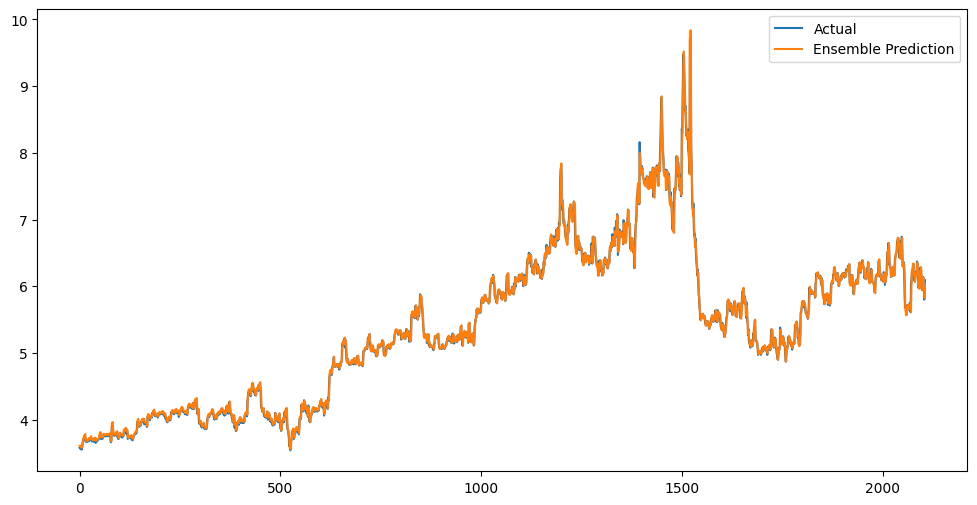

In [13]:
best_pred = best_alpha * pred_lstm + (1-best_alpha) * pred_gru

plt.figure(figsize=(12,6))
plt.plot(y_test_final, label='Actual')
plt.plot(best_pred, label='Ensemble Prediction')
plt.legend()
plt.show()
